In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("Student_Performance.csv")

In [11]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [2]:
X = data[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']]
# Convert 'Extracurricular Activities' to binary (0 for 'No' and 1 for 'Yes')
X['Extracurricular Activities'] = (data['Extracurricular Activities'] == 'Yes').astype(int)

y = data['Performance Index']

# Normalize the features (mean normalization)
X = (X - X.mean()) / X.std()

# Add a column of ones to X for the bias term (intercept)
X['Bias'] = 1

# Convert X and y to numpy arrays
X = X.to_numpy()
y = y.to_numpy()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5300\4068151569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Extracurricular Activities'] = (data['Extracurricular Activities'] == 'Yes').astype(int)


In [3]:
# Define the ratio for train-test split (e.g., 80% train, 20% test)
train_ratio = 0.75
num_samples = X.shape[0]
num_train = int(train_ratio * num_samples)
num_test = num_samples - num_train

# Split the data into training and testing sets
X_train, X_test = X[:num_train], X[num_train:]
y_train, y_test = y[:num_train], y[num_train:]

In [4]:
# Initialize parameters (coefficients)
theta = np.zeros(X_train.shape[1])

# Hyperparameters
alpha = 0.01  # Learning rate
num_iterations = 1000


In [5]:
# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = X.dot(theta)
    squared_error = (h - y) ** 2
    J = 1 / (2 * m) * squared_error.sum()
    return J

In [6]:
# Gradient descent
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = []
    for _ in range(num_iterations):
        h = X.dot(theta)
        gradient = (1 / m) * X.T.dot(h - y)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history


In [7]:
# Perform gradient descent on the training set
theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, num_iterations)

# Predict the test set
predicted_performance_test = X_test.dot(theta)

# Calculate evaluation metrics manually
def mean_squared_error_manual(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

mse = mean_squared_error_manual(y_test, predicted_performance_test)
print('Mean Squared Error (MSE):', mse)


Mean Squared Error (MSE): 4.25392676471945


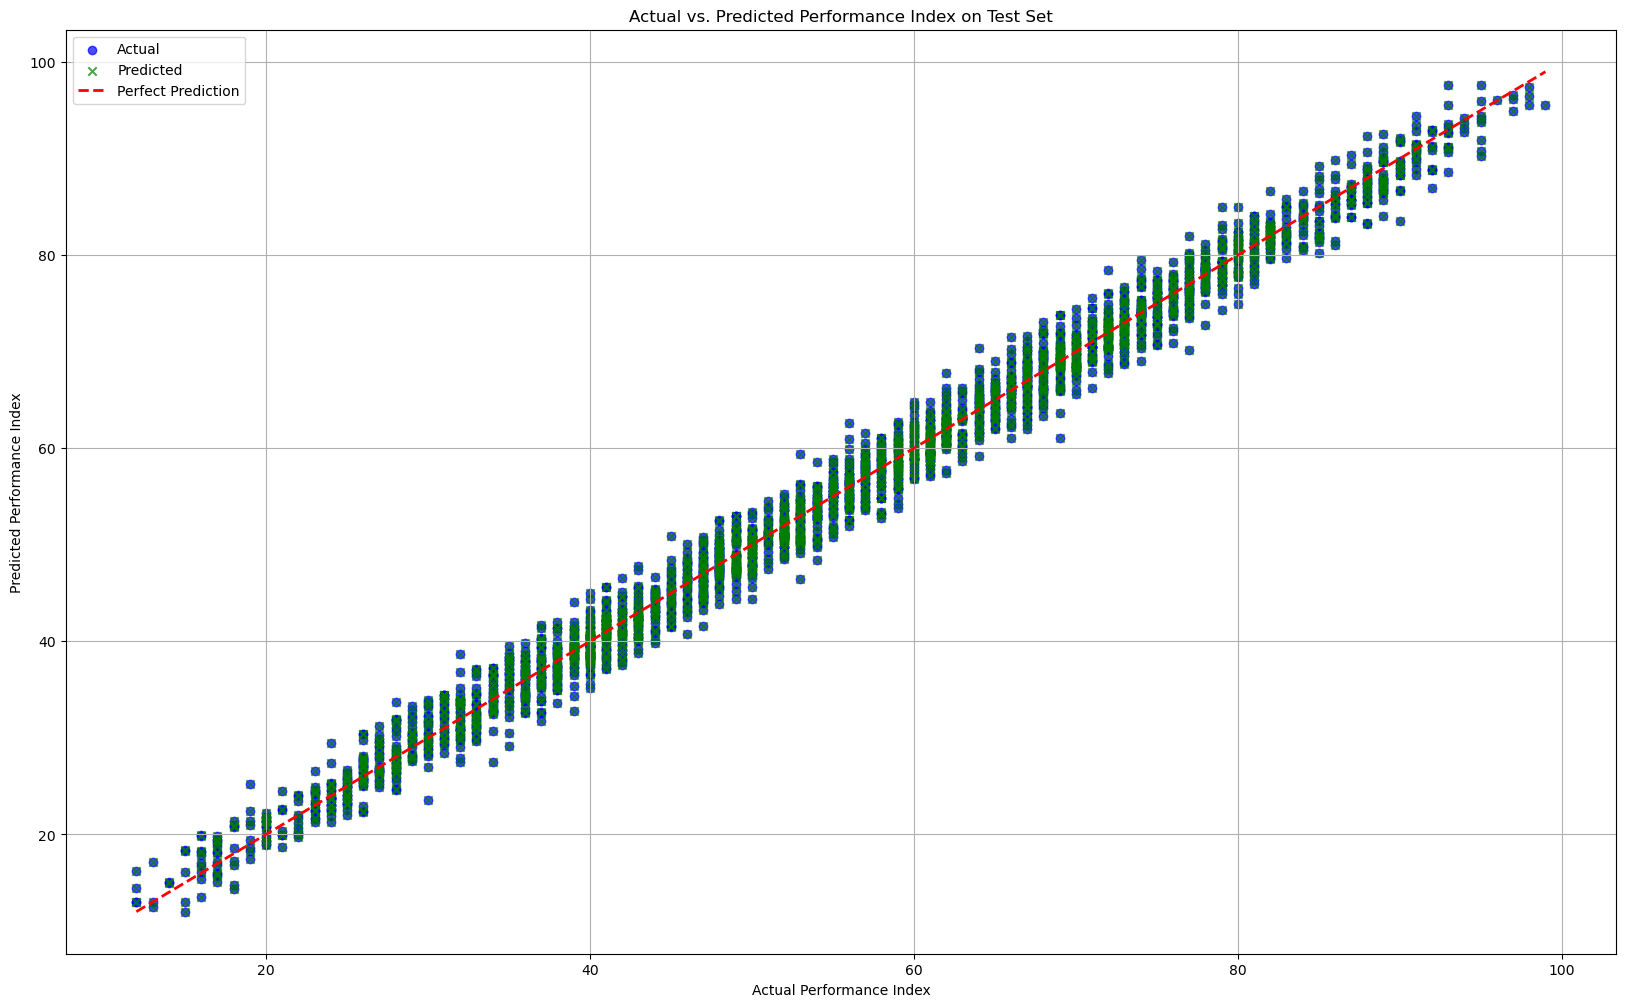

In [8]:
# Create a new figure for the predicted vs. actual values
plt.figure(figsize=(20, 12))
#plt.scatter(y_test, predicted_performance_test, color='blue', label='Actual vs. Predicted')
plt.scatter(y_test, predicted_performance_test, color='blue', label='Actual', alpha=0.7)
plt.scatter(y_test, predicted_performance_test, color='green', marker='x', label='Predicted', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs. Predicted Performance Index on Test Set')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Print the coefficients and predicted performance index on the test set
print('Coefficients (theta):', theta)
print('Predicted Performance Index on Test Set:', predicted_performance_test)

Coefficients (theta): [ 7.39031542 17.66175666  0.80260359  0.55542648  0.32712367 55.20466209]
Predicted Performance Index on Test Set: [37.38256361 57.43393962 83.66012786 ... 72.98906296 94.36693914
 65.24881314]
